# Exercise (No. 1,3,4,6) EDA and Machine Learning

1-Identify Data Anomalies

3-Government Spending Analysis

4-Data Integration and Demand Analysis

6-Machine Learning Forecasting



# Importing libraries

In [998]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns





import warnings
warnings.filterwarnings('ignore')

# Read dataset

In [999]:
df1 = pd.read_csv("Expense Data 1.csv")

In [1000]:
df2 = pd.read_csv("Expense Amount Data 1.csv")

In [1001]:
df1

,Expense Code,Month,Expense Quantity,Government Entity
0,10003,42948,1530,Ministry of Education
1,10003,42979,3060,Ministry of Education
2,10007,42917,1792,Ministry of Health
3,10007,42979,2048,Ministry of Health
4,10007,43132,1024,Ministry of Health
...,...,...,...,...
17080,9990,42856,2700,Ministry of Health
17081,9990,43160,100,Ministry of Health
17082,9996,42826,7800,Ministry of Energy
17083,9996,43009,5200,Ministry of Energy


In [1002]:
df2

,Expense Code,Expense Amount (SAR)
0,10532,4.46
1,10640,6.84
2,11053,0.36
3,11291,2.47
4,11436,1.70
...,...,...
3782,9827,10.45
3783,9838,4.41
3784,9859,5.12
3785,9920,0.42


# Exercise No. 4 Data Integration and Demand Analysis:
Describe how you would approach the integration of additional demand data into this dataset and what further analysis you could perform to better understand demand patterns.

Use Merging method the DataFrames on 'Expense Code'


In [1003]:

merged = pd.merge(df1, df2, on='Expense Code', how='outer')

# Display the merged DataFrame
print(merged)

       Expense Code  Month Expense Quantity      Government Entity  \
0             10003  42948             1530  Ministry of Education   
1             10003  42979             3060  Ministry of Education   
2             10007  42917             1792     Ministry of Health   
3             10007  42979             2048     Ministry of Health   
4             10007  43132             1024     Ministry of Health   
...             ...    ...              ...                    ...   
17080          9990  42856             2700     Ministry of Health   
17081          9990  43160              100     Ministry of Health   
17082          9996  42826             7800     Ministry of Energy   
17083          9996  43009             5200     Ministry of Energy   
17084          9996  43191             7800     Ministry of Energy   

       Expense Amount (SAR)  
0                      4.48  
1                      4.48  
2                      8.82  
3                      8.82  
4        

In [1004]:
df=merged

In [1005]:
df

,Expense Code,Month,Expense Quantity,Government Entity,Expense Amount (SAR)
0,10003,42948,1530,Ministry of Education,4.48
1,10003,42979,3060,Ministry of Education,4.48
2,10007,42917,1792,Ministry of Health,8.82
3,10007,42979,2048,Ministry of Health,8.82
4,10007,43132,1024,Ministry of Health,8.82
...,...,...,...,...,...
17080,9990,42856,2700,Ministry of Health,3.63
17081,9990,43160,100,Ministry of Health,3.63
17082,9996,42826,7800,Ministry of Energy,9.84
17083,9996,43009,5200,Ministry of Energy,9.84


In [1006]:
df.shape

(17085, 5)

# Information about dataset

In [1007]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085 entries, 0 to 17084
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Expense Code          17085 non-null  int64  
 1   Month                 17085 non-null  object 
 2   Expense Quantity      17083 non-null  object 
 3   Government Entity     17085 non-null  object 
 4   Expense Amount (SAR)  17085 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 800.9+ KB


# Exercise No.1 Identify Data Anomalies: 
identify any data anomalies and provide justification for how you would treat the issues you find in the dataset.

Data cleaning and processing

In [1008]:
# Check the data types
df.dtypes

Expense Code              int64
Month                    object
Expense Quantity         object
Government Entity        object
Expense Amount (SAR)    float64
dtype: object

In [1009]:
df.describe()

,Expense Code,Expense Amount (SAR)
count,17085.000000,17085.000000
mean,11547.052853,5.590861
std,8484.425473,2.940233
min,4.000000,0.010000
25%,2656.000000,3.060000
50%,11522.000000,5.670000
75%,20573.000000,8.060000
max,23429.000000,10.990000


In [1010]:
# Check for missing values
df.isna().sum()

Expense Code            0
Month                   0
Expense Quantity        2
Government Entity       0
Expense Amount (SAR)    0
dtype: int64

In [1011]:
df = df.fillna(method = 'pad')

In [1012]:
df.isna().sum()

Expense Code            0
Month                   0
Expense Quantity        0
Government Entity       0
Expense Amount (SAR)    0
dtype: int64

In [1013]:
df.duplicated().sum()

0

In [1014]:
# Check for duplicates and drop them
df = df.drop_duplicates()


# Data Preprocessing
Convert the string to an integer
Convert the Month to datetime64 and Added a new column named "Date"

In [1015]:
# Convert the string to an integer
df['Expense Quantity'] = pd.to_numeric(df['Expense Quantity'], errors='coerce').fillna(0, downcast='infer')

In [1016]:
# Convert the Month
df['Date']=pd.to_datetime(pd.to_numeric(df['Month'],errors='coerce'),errors='coerce',origin='1899-12-30',unit='D')

df['Date']

0       2017-08-01
1       2017-09-01
2       2017-07-01
3       2017-09-01
4       2018-02-01
           ...    
17080   2017-05-01
17081   2018-03-01
17082   2017-04-01
17083   2017-10-01
17084   2018-04-01
Name: Date, Length: 17085, dtype: datetime64[ns]

In [1017]:
df = df.sort_values(by='Date')
df

,Expense Code,Month,Expense Quantity,Government Entity,Expense Amount (SAR),Date
14927,4813,42826,4728,Ministry of Health,2.18,2017-04-01
6620,21550,42826,11200,Ministry of Education,5.96,2017-04-01
12779,2308,42826,2412,Ministry of Energy,5.53,2017-04-01
9779,344,42826,1188,Ministry of Energy,5.01,2017-04-01
1309,13431,42826,40,Ministry of Health,7.78,2017-04-01
...,...,...,...,...,...,...
8603,23228,43221,450,Ministry of Education,3.00,2018-05-01
8478,23173,43221,312,Ministry of Health,3.93,2018-05-01
8543,23201,43221,4800,Ministry of Education,3.75,2018-05-01
679,12083,9/1/2017000,4692,Ministry of Education,6.32,NaT


In [1018]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085 entries, 14927 to 4492
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Expense Code          17085 non-null  int64         
 1   Month                 17085 non-null  object        
 2   Expense Quantity      17085 non-null  int64         
 3   Government Entity     17085 non-null  object        
 4   Expense Amount (SAR)  17085 non-null  float64       
 5   Date                  17083 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 934.3+ KB


drop column "Month"

In [1019]:
df.drop('Month',axis = 1 , inplace = True)

In [1020]:
df= df.fillna(method = 'pad')

In [1021]:
df.isna().sum()

Expense Code            0
Expense Quantity        0
Government Entity       0
Expense Amount (SAR)    0
Date                    0
dtype: int64

In [1022]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085 entries, 14927 to 4492
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Expense Code          17085 non-null  int64         
 1   Expense Quantity      17085 non-null  int64         
 2   Government Entity     17085 non-null  object        
 3   Expense Amount (SAR)  17085 non-null  float64       
 4   Date                  17085 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 800.9+ KB


In [1023]:
df.duplicated().sum()

0

In [1024]:
df.head()

,Expense Code,Expense Quantity,Government Entity,Expense Amount (SAR),Date
14927,4813,4728,Ministry of Health,2.18,2017-04-01
6620,21550,11200,Ministry of Education,5.96,2017-04-01
12779,2308,2412,Ministry of Energy,5.53,2017-04-01
9779,344,1188,Ministry of Energy,5.01,2017-04-01
1309,13431,40,Ministry of Health,7.78,2017-04-01


# Exploratory Data Analysis (EDA)

<Figure size 1000x600 with 0 Axes>

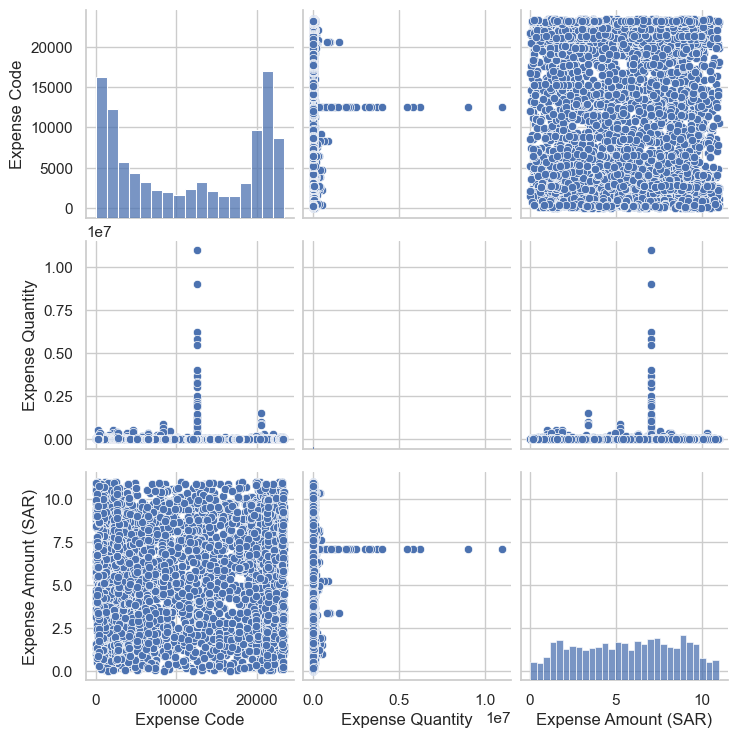

In [1025]:
# Create a pairplot to visualize the relationships between variables
plt.figure(figsize=(10, 6))
sns.pairplot(df)
plt.show()

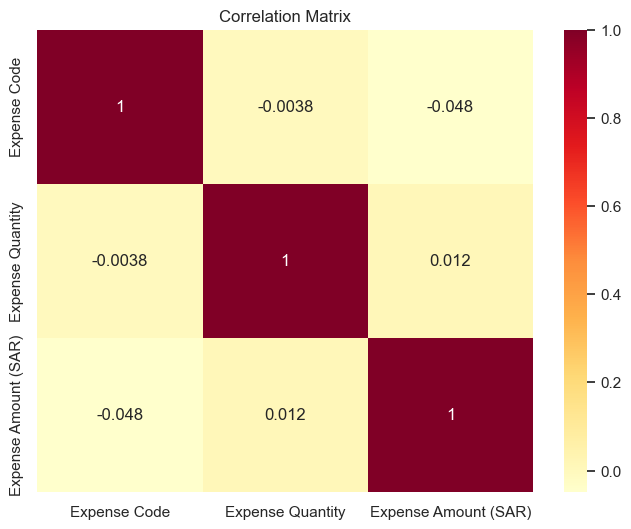

In [1026]:
# heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

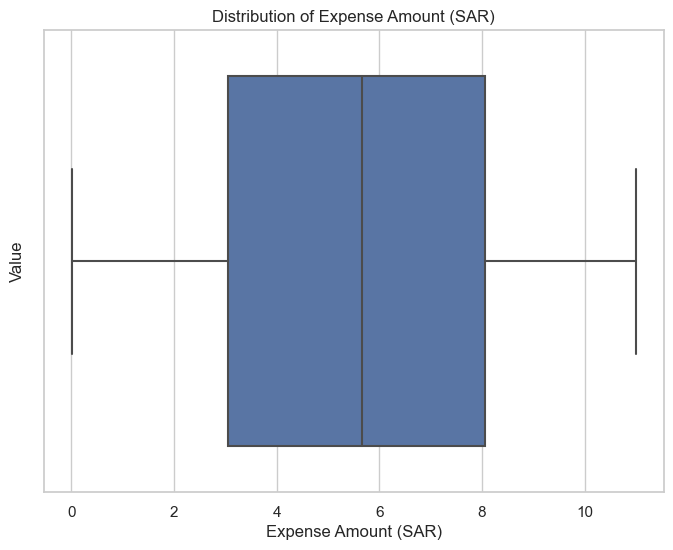

In [1027]:
# outlier 
plt.figure(figsize=(8, 6))
sns.boxplot(x='Expense Amount (SAR)', data=df)
plt.title('Distribution of Expense Amount (SAR)')
plt.xlabel('Expense Amount (SAR)')
plt.ylabel('Value')
plt.show()

# Exercise No. 3 Government Spending Analysis: 
Through analysis, confirm how much has been spent in terms of value by government entities.

(Calculate the total expense amount for each Government Entity)

In [1028]:
total_expense = df.groupby('Government Entity')['Expense Amount (SAR)'].sum().reset_index()

# Display the total expense by each government entity
print(total_expense)
total_expense.head()


       Government Entity  Expense Amount (SAR)
0  Ministry of Education              20534.30
1     Ministry of Energy              38775.42
2     Ministry of Health              29122.76
3    Ministry of Housing               7087.38


,Government Entity,Expense Amount (SAR)
0,Ministry of Education,20534.30
1,Ministry of Energy,38775.42
2,Ministry of Health,29122.76
3,Ministry of Housing,7087.38


In [1029]:
# Sort the data by the total expense amount in descending order
total_expense = total_expense.sort_values('Expense Amount (SAR)', ascending=False)
total_expense.head()

,Government Entity,Expense Amount (SAR)
1,Ministry of Energy,38775.42
2,Ministry of Health,29122.76
0,Ministry of Education,20534.30
3,Ministry of Housing,7087.38


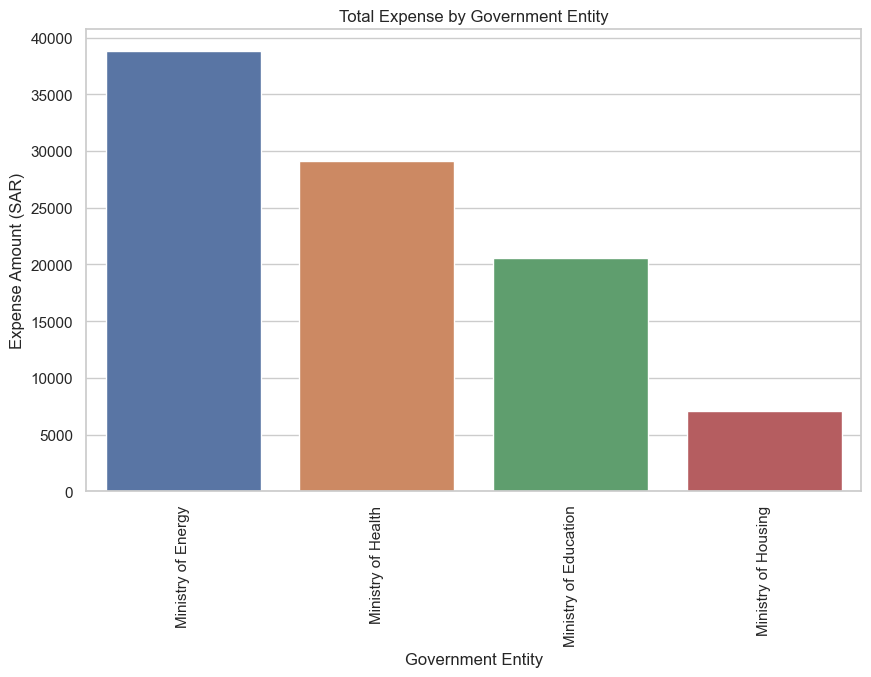

In [1030]:
#Use bar plot to visualize the total expense for each government entity
plt.figure(figsize=(10, 6))
sns.barplot(x='Government Entity', y='Expense Amount (SAR)', data=total_expense)
plt.xticks(rotation=90)
plt.title('Total Expense by Government Entity')
plt.xlabel('Government Entity')
plt.ylabel('Expense Amount (SAR)')
plt.show()

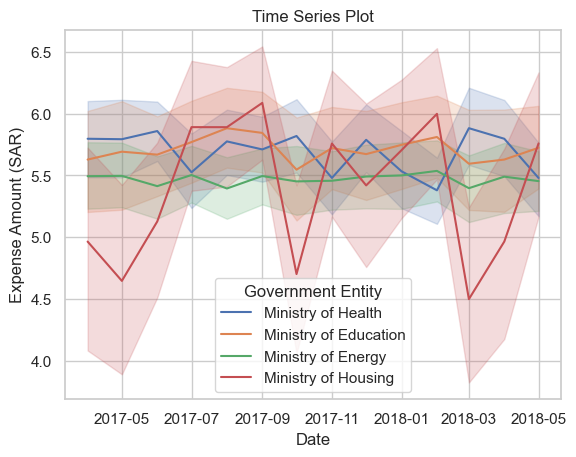

In [1031]:
sns.lineplot(x='Date', y='Expense Amount (SAR)', hue='Government Entity', data=df)
plt.grid(True)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Expense Amount (SAR)')
plt.show()

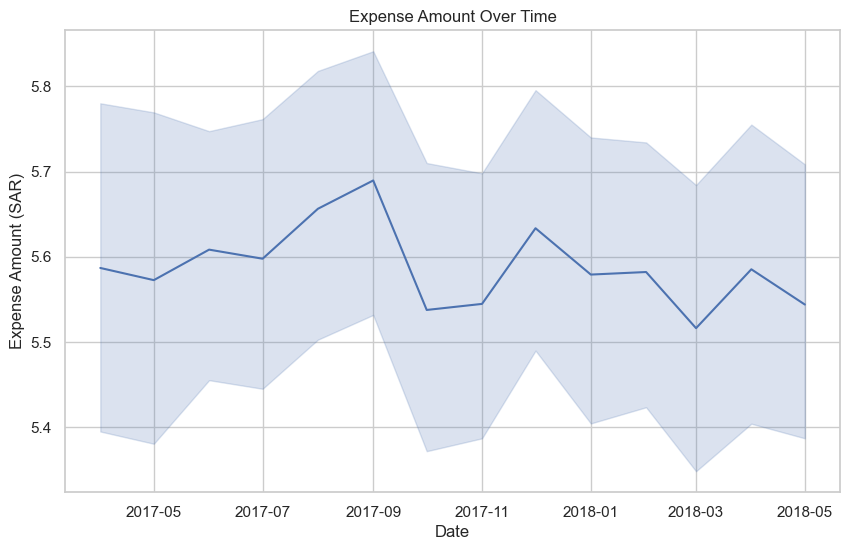

In [1032]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Expense Amount (SAR)', data=df)
plt.title('Expense Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Expense Amount (SAR)')
plt.show()

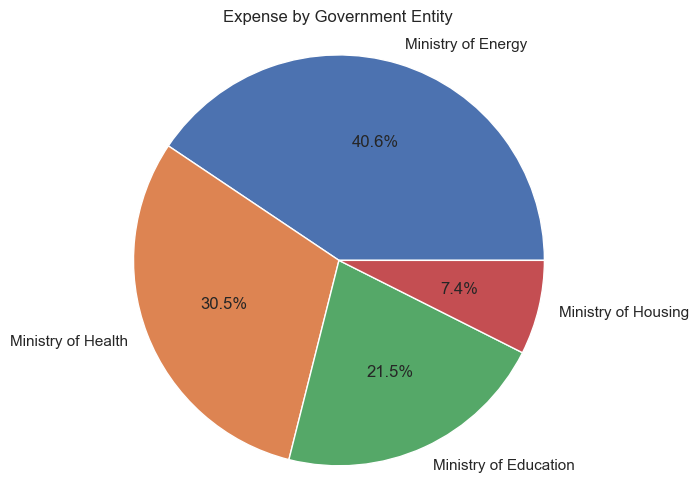

In [1033]:
expense_by_government = df.groupby('Government Entity')['Expense Amount (SAR)'].sum().reset_index()

# Sort the categories by total expense amount
expense_by_government = expense_by_government.sort_values('Expense Amount (SAR)', ascending=False)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(expense_by_government['Expense Amount (SAR)'], labels=expense_by_government['Government Entity'], autopct='%1.1f%%')
plt.title('Expense by Government Entity')
plt.axis('equal')
plt.show()

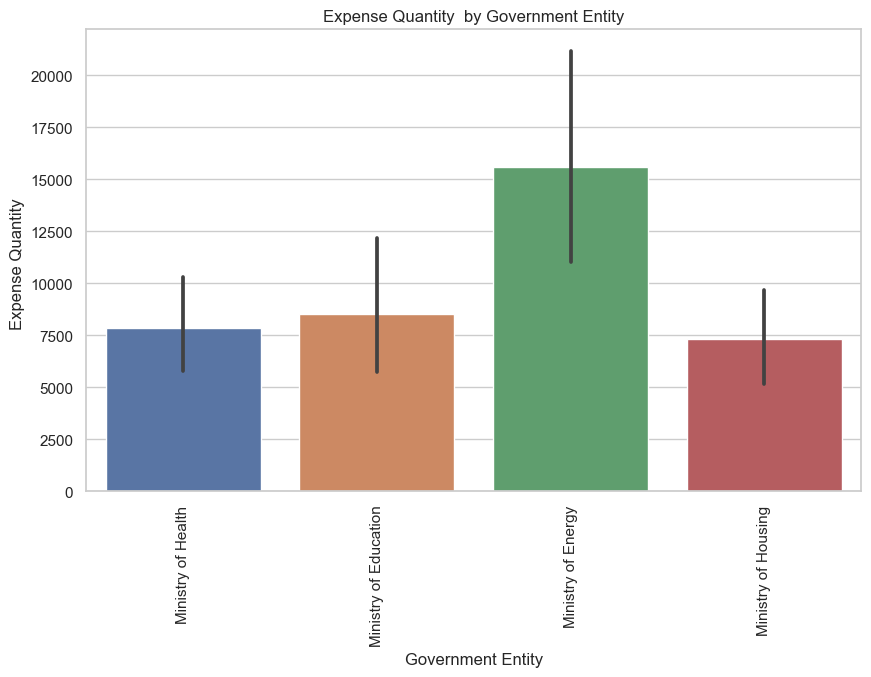

In [1034]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Government Entity', y='Expense Quantity', data=df)
plt.title('Expense Quantity  by Government Entity')
plt.xlabel('Government Entity')
plt.ylabel('Expense Quantity ')
plt.xticks(rotation=90)
plt.show()

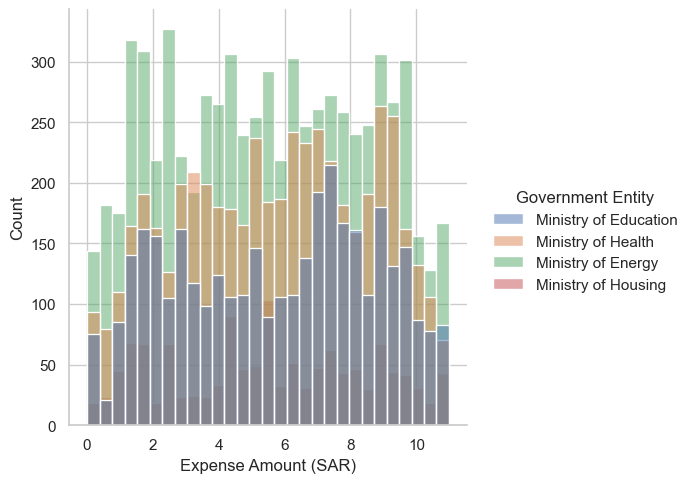

In [1035]:
sns.set(style="whitegrid")
sns.displot(data=merged, x="Expense Amount (SAR)", hue="Government Entity" , kind = "hist")

#  Encode categorical variables 'Government Entity'

In [1036]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Government Entity'] = le.fit_transform(df['Government Entity'])

In [1037]:
df.tail(5)

,Expense Code,Expense Quantity,Government Entity,Expense Amount (SAR),Date
8603,23228,450,0,3.00,2018-05-01
8478,23173,312,2,3.93,2018-05-01
8543,23201,4800,0,3.75,2018-05-01
679,12083,4692,0,6.32,2018-05-01
4492,20394,1554,2,5.41,2018-05-01


In [1038]:
df.set_index('Date',inplace= True)
df.head()

,Expense Code,Expense Quantity,Government Entity,Expense Amount (SAR)
Date,,,,
2017-04-01,4813,4728,2,2.18
2017-04-01,21550,11200,0,5.96
2017-04-01,2308,2412,1,5.53
2017-04-01,344,1188,1,5.01
2017-04-01,13431,40,2,7.78


# Exercise No. 6 Machine Learning Forecasting: 
Leverage Machine Learning (ML) to forecast and predict how much will be spent in terms of value by government entities.

Importing libraries for Machine Learning Forecasting

# 1. Random Forest Regressor Model

In [1039]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [1040]:
# Define features and target
X = df[['Expense Code', 'Expense Quantity', 'Government Entity']]
y = df['Expense Amount (SAR)']

Split the Data into Training and Testing Sets 20/80

In [1041]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1042]:
from sklearn.ensemble import RandomForestRegressor
# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [1043]:
# Check the model performance
score = rf.score(X_test, y_test)
score

0.6779793515137111

In [1044]:
from sklearn.metrics import mean_squared_error, r2_score

In [1045]:
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [1046]:
print("MSE - Train: {:} Test: {:}".format(mse_train, mse_test))
print("R2 - Train: {:} Test: {:}".format(r2_train, r2_test))

MSE - Train: 0.3812384749963416 Test: 2.8697515564676617
R2 - Train: 0.9555451510436184 Test: 0.6779793515137111


# Forecasting Date Start (2024-07-01)

In [1047]:
# Prepare future dates for forecasting
future_dates = pd.date_range(start='2024-07-01', periods=6, freq='MS')

# Create a DataFrame for future predictions with the date as index
future_data = pd.DataFrame({
    'Expense Code': [10003] * 3 + [10007] * 3,
    'Expense Quantity': [1530, 3060, 1530, 1792, 2048, 1024],  # Example quantities
    'Government Entity': [0] * 3 + [2] * 3  # Encoded values for the entities
}, index=future_dates)

# Predict future expense amounts
future_data['Predicted Expense Amount (SAR)'] = rf.predict(future_data)

future_data[['Expense Code', 'Expense Quantity', 'Government Entity', 'Predicted Expense Amount (SAR)']]

,Expense Code,Expense Quantity,Government Entity,Predicted Expense Amount (SAR)
2024-07-01,10003,1530,0,5.6039
2024-08-01,10003,3060,0,5.2623
2024-09-01,10003,1530,0,5.6039
2024-10-01,10007,1792,2,8.2612
2024-11-01,10007,2048,2,7.5258
2024-12-01,10007,1024,2,8.2097


#  2. Xgboost Model

In [1048]:
import xgboost as xgb

In [1049]:
# Train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [1050]:
y_pred = model.predict(X_test)
y_pred

array([3.3109927, 7.35875  , 5.028367 , ..., 6.2043824, 3.4000888,
       4.7097006], dtype=float32)

In [1051]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Metrics")
print("=" * 40)
print(f"Mean Squared Error: {mse.round(4)}")
print(f"R² Score: {r2}")

Metrics
Mean Squared Error: 6.9255
R² Score: 0.2228793150499656


# Forecasting Date Start (2024-07-01)

In [1054]:
# Predict future values
future_new = pd.date_range(start='2024-07-01', periods=6, freq='MS')
future_new = pd.DataFrame({
    'Expense Code': [10003] * 3 + [10007] * 3,
    'Expense Quantity': [1530, 3060, 1530, 1792, 2048, 1024],
    'Government Entity': [0] * 3 + [1] * 3
}, index=future_new)

future_new['Predicted Expense Amount (SAR)'] = model.predict(future_new)
future_new.head()

,Expense Code,Expense Quantity,Government Entity,Predicted Expense Amount (SAR)
2024-07-01,10003,1530,0,5.852091
2024-08-01,10003,3060,0,5.605833
2024-09-01,10003,1530,0,5.852091
2024-10-01,10007,1792,1,5.716750
2024-11-01,10007,2048,1,6.745986
